In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
data = load_linnerud()
X, y = data.data, data.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RandomForestClassifier(random_state=42)

In [12]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y[:, 0] 

Модель-классификатор:
Accuracy: 0.9740740740740741
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       0.92      1.00      0.96        55
           2       0.98      1.00      0.99        53
           3       1.00      0.93      0.96        55
           4       1.00      0.94      0.97        54
           5       0.98      1.00      0.99        55
           6       1.00      0.98      0.99        54
           7       0.96      1.00      0.98        54
           8       0.94      0.90      0.92        52
           9       1.00      0.98      0.99        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

Результаты перекрестной проверки:
Средняя точность (accuracy): 0.9697622209574401


In [13]:
print(df.head())
print(df.describe())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=555),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [14]:
knn_params = {'n_neighbors': [3, 5, 7, 9]}
knn = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5)
knn.fit(X_train, y_train[:, 0]) 

y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test[:, 0], y_pred_knn)
r2_knn = r2_score(y_test[:, 0], y_pred_knn)

print("KNeighborsRegressor")
print("Лучшие параметры:", knn.best_params_)
print("MSE:", mse_knn)
print("R2:", r2_knn)


Лучшие параметры после поиска по сетке:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Модель с оптимизированными параметрами:
Accuracy: 0.9703703703703703
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       0.93      0.98      0.96        55
           2       0.98      1.00      0.99        53
           3       1.00      0.95      0.97        55
           4       0.98      0.96      0.97        54
           5       0.96      0.98      0.97        55
           6       1.00      0.98      0.99        54
           7       0.96      1.00      0.98        54
           8       0.94      0.87      0.90        52
           9       0.96      0.98      0.97        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540


Модель LinearRegression

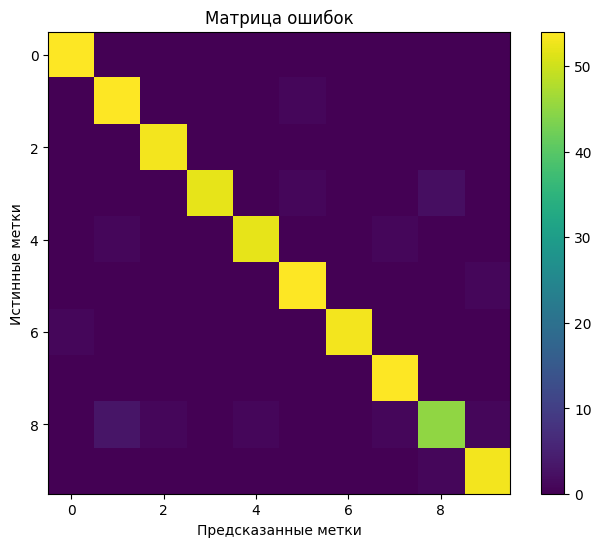

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train[:, 0])

y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test[:, 0], y_pred_lin)
r2_lin = r2_score(y_test[:, 0], y_pred_lin)

print("LinearRegression")
print("MSE:", mse_lin)
print("R2:", r2_lin)

Модель Ridge

In [16]:
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge.fit(X_train, y_train[:, 0])

y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test[:, 0], y_pred_ridge)
r2_ridge = r2_score(y_test[:, 0], y_pred_ridge)

print("Ridge")
print("Лучшие параметры:", ridge.best_params_)
print("MSE:", mse_ridge)
print("R2:", r2_ridge)


Сравнение точности:
Базовая: 0.9741
Улучшенная: 0.9704


Модель Lasso

In [19]:
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso.fit(X_train, y_train[:, 0])

y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test[:, 0], y_pred_lasso)
r2_lasso = r2_score(y_test[:, 0], y_pred_lasso)

print("Lasso")
print("Лучшие параметры:", lasso.best_params_)
print("MSE:", mse_lasso)
print("R2:", r2_lasso)

Модель LogisticRegression

In [20]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train[:, 0] > np.median(y_train[:, 0]))

y_pred_log = log_reg.predict(X_test)
y_true_binary = (y_test[:, 0] > np.median(y_train[:, 0])).astype(int)
y_pred_binary = y_pred_log.astype(int)

mse_log = mean_squared_error(y_true_binary, y_pred_binary)
r2_log = r2_score(y_true_binary, y_pred_binary)

print("LogisticRegression")
print("MSE:", mse_log)
print("R2:", r2_log)

In [21]:
results = pd.DataFrame({
    "Model": ["KNeighborsRegressor", "LinearRegression", "Ridge", "Lasso", "LogisticRegression"],
    "MSE": [mse_knn, mse_lin, mse_ridge, mse_lasso, mse_log],
    "R2 Score": [r2_knn, r2_lin, r2_ridge, r2_lasso, r2_log]
})

print(results)

Вывод:

Модели с более низким значением MSE обладают лучшей предсказательной способностью.